In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")


In [61]:
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

In [99]:
rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

In [100]:
rawdata.head

<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
5    15.0          8         429.0       198.0  4341.0          10.0   
6    14.0          8         454.0       220.0  4354.0           9.0   
7    14.0          8         440.0       215.0  4312.0           8.5   
8    14.0          8         455.0       225.0  4425.0          10.0   
9    15.0          8         390.0       190.0  3850.0           8.5   
10   15.0          8         383.0       170.0  3563.0          10.0   
11   14.0          8         340.0       160.0  3609.0           8.0   
12   15.0          8         400.0

In [101]:

rawdata.dropna(inplace=True)

In [102]:
data = rawdata.copy()

In [103]:
data = pd.get_dummies(data, columns=['cylinders', 'origin'])

In [104]:
data2 = pd.get_dummies(data)

In [105]:
data2.head()

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


In [106]:
label = data.pop('mpg')

In [107]:
data.shape

(392, 13)

In [108]:
data.head()

,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0


In [144]:
X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [145]:
from tensorflow.keras.models import Sequential
tf.keras.backend.clear_session()
model = Sequential()
from tensorflow.keras.layers import Dense, Activation, Dropout
model.add(Dense(64, input_shape=(13,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))

In [146]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [147]:
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test), verbose=1)

Train on 294 samples, validate on 98 samples
Epoch 1/1000
294/294 [==============================] - 0s 517us/sample - loss: 614.0778 - mean_absolute_error: 23.5518 - mean_squared_error: 614.0778 - val_loss: 518.1692 - val_mean_absolute_error: 21.3797 - val_mean_squared_error: 518.1692
Epoch 2/1000
294/294 [==============================] - 0s 44us/sample - loss: 570.7387 - mean_absolute_error: 22.5507 - mean_squared_error: 570.7387 - val_loss: 474.5288 - val_mean_absolute_error: 20.2744 - val_mean_squared_error: 474.5288
Epoch 3/1000
294/294 [==============================] - 0s 37us/sample - loss: 524.5765 - mean_absolute_error: 21.4602 - mean_squared_error: 524.5764 - val_loss: 425.8244 - val_mean_absolute_error: 18.9732 - val_mean_squared_error: 425.8244
Epoch 4/1000
294/294 [==============================] - 0s 41us/sample - loss: 469.5938 - mean_absolute_error: 20.0878 - mean_squared_error: 469.5938 - val_loss: 366.4008 - val_mean_absolute_error: 17.2548 - val_mean_squared_error:

Epoch 36/1000
294/294 [==============================] - 0s 34us/sample - loss: 7.5891 - mean_absolute_error: 2.0567 - mean_squared_error: 7.5891 - val_loss: 7.1655 - val_mean_absolute_error: 1.8767 - val_mean_squared_error: 7.1655
Epoch 37/1000
294/294 [==============================] - 0s 41us/sample - loss: 7.4664 - mean_absolute_error: 2.0421 - mean_squared_error: 7.4664 - val_loss: 7.1226 - val_mean_absolute_error: 1.8554 - val_mean_squared_error: 7.1226
Epoch 38/1000
294/294 [==============================] - 0s 37us/sample - loss: 7.3778 - mean_absolute_error: 2.0292 - mean_squared_error: 7.3778 - val_loss: 7.1255 - val_mean_absolute_error: 1.8562 - val_mean_squared_error: 7.1255
Epoch 39/1000
294/294 [==============================] - 0s 37us/sample - loss: 7.2971 - mean_absolute_error: 2.0153 - mean_squared_error: 7.2971 - val_loss: 7.0175 - val_mean_absolute_error: 1.8240 - val_mean_squared_error: 7.0175
Epoch 40/1000
294/294 [==============================] - 0s 37us/sample 

294/294 [==============================] - 0s 37us/sample - loss: 6.1115 - mean_absolute_error: 1.8273 - mean_squared_error: 6.1115 - val_loss: 6.6413 - val_mean_absolute_error: 1.7288 - val_mean_squared_error: 6.6413
Epoch 72/1000
294/294 [==============================] - 0s 34us/sample - loss: 6.0618 - mean_absolute_error: 1.8214 - mean_squared_error: 6.0618 - val_loss: 6.6141 - val_mean_absolute_error: 1.7336 - val_mean_squared_error: 6.6141
Epoch 73/1000
294/294 [==============================] - 0s 34us/sample - loss: 6.0644 - mean_absolute_error: 1.8176 - mean_squared_error: 6.0644 - val_loss: 6.6650 - val_mean_absolute_error: 1.7466 - val_mean_squared_error: 6.6650
Epoch 74/1000
294/294 [==============================] - 0s 37us/sample - loss: 6.0298 - mean_absolute_error: 1.8153 - mean_squared_error: 6.0298 - val_loss: 6.5863 - val_mean_absolute_error: 1.7342 - val_mean_squared_error: 6.5863
Epoch 75/1000
294/294 [==============================] - 0s 34us/sample - loss: 6.0482

294/294 [==============================] - 0s 37us/sample - loss: 5.5029 - mean_absolute_error: 1.7284 - mean_squared_error: 5.5029 - val_loss: 6.3268 - val_mean_absolute_error: 1.6910 - val_mean_squared_error: 6.3268
Epoch 107/1000
294/294 [==============================] - 0s 34us/sample - loss: 5.4746 - mean_absolute_error: 1.7290 - mean_squared_error: 5.4746 - val_loss: 6.4460 - val_mean_absolute_error: 1.7240 - val_mean_squared_error: 6.4460
Epoch 108/1000
294/294 [==============================] - 0s 37us/sample - loss: 5.4569 - mean_absolute_error: 1.7267 - mean_squared_error: 5.4569 - val_loss: 6.3634 - val_mean_absolute_error: 1.6985 - val_mean_squared_error: 6.3634
Epoch 109/1000
294/294 [==============================] - 0s 37us/sample - loss: 5.4385 - mean_absolute_error: 1.7276 - mean_squared_error: 5.4385 - val_loss: 6.5085 - val_mean_absolute_error: 1.7241 - val_mean_squared_error: 6.5085
Epoch 110/1000
294/294 [==============================] - 0s 44us/sample - loss: 5.

294/294 [==============================] - 0s 41us/sample - loss: 5.1288 - mean_absolute_error: 1.6712 - mean_squared_error: 5.1288 - val_loss: 6.3395 - val_mean_absolute_error: 1.6841 - val_mean_squared_error: 6.3395
Epoch 142/1000
294/294 [==============================] - 0s 37us/sample - loss: 5.0880 - mean_absolute_error: 1.6600 - mean_squared_error: 5.0880 - val_loss: 6.3821 - val_mean_absolute_error: 1.6860 - val_mean_squared_error: 6.3821
Epoch 143/1000
294/294 [==============================] - 0s 34us/sample - loss: 5.1745 - mean_absolute_error: 1.6700 - mean_squared_error: 5.1745 - val_loss: 6.3036 - val_mean_absolute_error: 1.6663 - val_mean_squared_error: 6.3036
Epoch 144/1000
294/294 [==============================] - 0s 34us/sample - loss: 5.1322 - mean_absolute_error: 1.6852 - mean_squared_error: 5.1322 - val_loss: 6.6074 - val_mean_absolute_error: 1.7458 - val_mean_squared_error: 6.6074
Epoch 145/1000
294/294 [==============================] - 0s 34us/sample - loss: 5.

294/294 [==============================] - 0s 41us/sample - loss: 4.8929 - mean_absolute_error: 1.6200 - mean_squared_error: 4.8929 - val_loss: 6.3361 - val_mean_absolute_error: 1.6751 - val_mean_squared_error: 6.3361
Epoch 177/1000
294/294 [==============================] - 0s 41us/sample - loss: 4.8496 - mean_absolute_error: 1.6137 - mean_squared_error: 4.8496 - val_loss: 6.2877 - val_mean_absolute_error: 1.6655 - val_mean_squared_error: 6.2877
Epoch 178/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.8923 - mean_absolute_error: 1.6204 - mean_squared_error: 4.8923 - val_loss: 6.2838 - val_mean_absolute_error: 1.6681 - val_mean_squared_error: 6.2838
Epoch 179/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.8639 - mean_absolute_error: 1.6200 - mean_squared_error: 4.8639 - val_loss: 6.2995 - val_mean_absolute_error: 1.6817 - val_mean_squared_error: 6.2995
Epoch 180/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.

294/294 [==============================] - 0s 34us/sample - loss: 4.7091 - mean_absolute_error: 1.5786 - mean_squared_error: 4.7091 - val_loss: 6.3141 - val_mean_absolute_error: 1.6672 - val_mean_squared_error: 6.3141
Epoch 212/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.6427 - mean_absolute_error: 1.5793 - mean_squared_error: 4.6427 - val_loss: 6.4141 - val_mean_absolute_error: 1.6898 - val_mean_squared_error: 6.4141
Epoch 213/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.6441 - mean_absolute_error: 1.5703 - mean_squared_error: 4.6441 - val_loss: 6.4551 - val_mean_absolute_error: 1.7043 - val_mean_squared_error: 6.4551
Epoch 214/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.6560 - mean_absolute_error: 1.5768 - mean_squared_error: 4.6560 - val_loss: 6.2367 - val_mean_absolute_error: 1.6571 - val_mean_squared_error: 6.2367
Epoch 215/1000
294/294 [==============================] - 0s 34us/sample - loss: 4.

294/294 [==============================] - 0s 37us/sample - loss: 4.4055 - mean_absolute_error: 1.5252 - mean_squared_error: 4.4055 - val_loss: 6.1792 - val_mean_absolute_error: 1.6532 - val_mean_squared_error: 6.1792
Epoch 247/1000
294/294 [==============================] - 0s 41us/sample - loss: 4.4179 - mean_absolute_error: 1.5238 - mean_squared_error: 4.4179 - val_loss: 6.1948 - val_mean_absolute_error: 1.6501 - val_mean_squared_error: 6.1948
Epoch 248/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.3967 - mean_absolute_error: 1.5192 - mean_squared_error: 4.3967 - val_loss: 6.1809 - val_mean_absolute_error: 1.6527 - val_mean_squared_error: 6.1809
Epoch 249/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.4311 - mean_absolute_error: 1.5197 - mean_squared_error: 4.4311 - val_loss: 6.2792 - val_mean_absolute_error: 1.6692 - val_mean_squared_error: 6.2792
Epoch 250/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.

294/294 [==============================] - 0s 37us/sample - loss: 4.1866 - mean_absolute_error: 1.4693 - mean_squared_error: 4.1866 - val_loss: 6.1593 - val_mean_absolute_error: 1.6450 - val_mean_squared_error: 6.1593
Epoch 282/1000
294/294 [==============================] - 0s 34us/sample - loss: 4.2150 - mean_absolute_error: 1.4787 - mean_squared_error: 4.2150 - val_loss: 6.1451 - val_mean_absolute_error: 1.6593 - val_mean_squared_error: 6.1451
Epoch 283/1000
294/294 [==============================] - 0s 34us/sample - loss: 4.2380 - mean_absolute_error: 1.4715 - mean_squared_error: 4.2380 - val_loss: 6.2225 - val_mean_absolute_error: 1.6731 - val_mean_squared_error: 6.2225
Epoch 284/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.2220 - mean_absolute_error: 1.4783 - mean_squared_error: 4.2220 - val_loss: 6.2279 - val_mean_absolute_error: 1.6721 - val_mean_squared_error: 6.2279
Epoch 285/1000
294/294 [==============================] - 0s 34us/sample - loss: 4.

Epoch 316/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.0912 - mean_absolute_error: 1.4384 - mean_squared_error: 4.0912 - val_loss: 6.4036 - val_mean_absolute_error: 1.7128 - val_mean_squared_error: 6.4036
Epoch 317/1000
294/294 [==============================] - 0s 34us/sample - loss: 4.0880 - mean_absolute_error: 1.4582 - mean_squared_error: 4.0880 - val_loss: 6.3815 - val_mean_absolute_error: 1.7047 - val_mean_squared_error: 6.3815
Epoch 318/1000
294/294 [==============================] - 0s 37us/sample - loss: 4.0368 - mean_absolute_error: 1.4396 - mean_squared_error: 4.0368 - val_loss: 6.3870 - val_mean_absolute_error: 1.7008 - val_mean_squared_error: 6.3870
Epoch 319/1000
294/294 [==============================] - 0s 41us/sample - loss: 3.9846 - mean_absolute_error: 1.4234 - mean_squared_error: 3.9846 - val_loss: 6.3536 - val_mean_absolute_error: 1.6939 - val_mean_squared_error: 6.3536
Epoch 320/1000
294/294 [==============================] - 0s 41us/sa

294/294 [==============================] - 0s 41us/sample - loss: 3.8171 - mean_absolute_error: 1.3840 - mean_squared_error: 3.8171 - val_loss: 6.4606 - val_mean_absolute_error: 1.7308 - val_mean_squared_error: 6.4606
Epoch 352/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.9243 - mean_absolute_error: 1.4121 - mean_squared_error: 3.9243 - val_loss: 6.4356 - val_mean_absolute_error: 1.7331 - val_mean_squared_error: 6.4356
Epoch 353/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.9883 - mean_absolute_error: 1.4315 - mean_squared_error: 3.9883 - val_loss: 6.2453 - val_mean_absolute_error: 1.7058 - val_mean_squared_error: 6.2453
Epoch 354/1000
294/294 [==============================] - 0s 41us/sample - loss: 3.8565 - mean_absolute_error: 1.3862 - mean_squared_error: 3.8565 - val_loss: 6.2903 - val_mean_absolute_error: 1.7074 - val_mean_squared_error: 6.2903
Epoch 355/1000
294/294 [==============================] - 0s 34us/sample - loss: 3.

294/294 [==============================] - 0s 37us/sample - loss: 3.8331 - mean_absolute_error: 1.3692 - mean_squared_error: 3.8331 - val_loss: 6.3306 - val_mean_absolute_error: 1.7383 - val_mean_squared_error: 6.3306
Epoch 387/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.6783 - mean_absolute_error: 1.3494 - mean_squared_error: 3.6783 - val_loss: 6.4431 - val_mean_absolute_error: 1.7498 - val_mean_squared_error: 6.4431
Epoch 388/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.7266 - mean_absolute_error: 1.3705 - mean_squared_error: 3.7266 - val_loss: 6.4641 - val_mean_absolute_error: 1.7304 - val_mean_squared_error: 6.4641
Epoch 389/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.7314 - mean_absolute_error: 1.3618 - mean_squared_error: 3.7314 - val_loss: 6.3569 - val_mean_absolute_error: 1.7229 - val_mean_squared_error: 6.3569
Epoch 390/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.

294/294 [==============================] - 0s 37us/sample - loss: 3.5430 - mean_absolute_error: 1.3191 - mean_squared_error: 3.5430 - val_loss: 6.3699 - val_mean_absolute_error: 1.7500 - val_mean_squared_error: 6.3699
Epoch 422/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.6046 - mean_absolute_error: 1.3248 - mean_squared_error: 3.6046 - val_loss: 6.3560 - val_mean_absolute_error: 1.7391 - val_mean_squared_error: 6.3560
Epoch 423/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.5246 - mean_absolute_error: 1.3124 - mean_squared_error: 3.5246 - val_loss: 6.3296 - val_mean_absolute_error: 1.7247 - val_mean_squared_error: 6.3296
Epoch 424/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.5217 - mean_absolute_error: 1.3076 - mean_squared_error: 3.5217 - val_loss: 6.2601 - val_mean_absolute_error: 1.7132 - val_mean_squared_error: 6.2601
Epoch 425/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.

294/294 [==============================] - 0s 34us/sample - loss: 3.3563 - mean_absolute_error: 1.2825 - mean_squared_error: 3.3563 - val_loss: 6.3717 - val_mean_absolute_error: 1.7444 - val_mean_squared_error: 6.3717
Epoch 457/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.4896 - mean_absolute_error: 1.3103 - mean_squared_error: 3.4896 - val_loss: 6.2444 - val_mean_absolute_error: 1.7295 - val_mean_squared_error: 6.2444
Epoch 458/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.3136 - mean_absolute_error: 1.2674 - mean_squared_error: 3.3136 - val_loss: 6.4219 - val_mean_absolute_error: 1.7737 - val_mean_squared_error: 6.4219
Epoch 459/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.3296 - mean_absolute_error: 1.2666 - mean_squared_error: 3.3296 - val_loss: 6.4525 - val_mean_absolute_error: 1.7724 - val_mean_squared_error: 6.4525
Epoch 460/1000
294/294 [==============================] - 0s 41us/sample - loss: 3.

294/294 [==============================] - 0s 34us/sample - loss: 3.2237 - mean_absolute_error: 1.2464 - mean_squared_error: 3.2237 - val_loss: 6.4954 - val_mean_absolute_error: 1.7678 - val_mean_squared_error: 6.4954
Epoch 492/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.2170 - mean_absolute_error: 1.2489 - mean_squared_error: 3.2170 - val_loss: 6.5176 - val_mean_absolute_error: 1.7844 - val_mean_squared_error: 6.5176
Epoch 493/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.2980 - mean_absolute_error: 1.2725 - mean_squared_error: 3.2980 - val_loss: 6.4096 - val_mean_absolute_error: 1.7552 - val_mean_squared_error: 6.4096
Epoch 494/1000
294/294 [==============================] - 0s 34us/sample - loss: 3.3325 - mean_absolute_error: 1.3094 - mean_squared_error: 3.3325 - val_loss: 6.6555 - val_mean_absolute_error: 1.7927 - val_mean_squared_error: 6.6555
Epoch 495/1000
294/294 [==============================] - 0s 34us/sample - loss: 3.

294/294 [==============================] - 0s 34us/sample - loss: 3.1432 - mean_absolute_error: 1.2488 - mean_squared_error: 3.1432 - val_loss: 6.4167 - val_mean_absolute_error: 1.7605 - val_mean_squared_error: 6.4167
Epoch 527/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.3407 - mean_absolute_error: 1.2859 - mean_squared_error: 3.3407 - val_loss: 6.7309 - val_mean_absolute_error: 1.8190 - val_mean_squared_error: 6.7309
Epoch 528/1000
294/294 [==============================] - 0s 34us/sample - loss: 3.3679 - mean_absolute_error: 1.3195 - mean_squared_error: 3.3679 - val_loss: 6.1557 - val_mean_absolute_error: 1.7236 - val_mean_squared_error: 6.1557
Epoch 529/1000
294/294 [==============================] - 0s 34us/sample - loss: 3.1789 - mean_absolute_error: 1.2454 - mean_squared_error: 3.1789 - val_loss: 6.5376 - val_mean_absolute_error: 1.8213 - val_mean_squared_error: 6.5376
Epoch 530/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.

294/294 [==============================] - 0s 37us/sample - loss: 3.0531 - mean_absolute_error: 1.2070 - mean_squared_error: 3.0531 - val_loss: 6.4773 - val_mean_absolute_error: 1.7927 - val_mean_squared_error: 6.4773
Epoch 562/1000
294/294 [==============================] - 0s 37us/sample - loss: 2.9820 - mean_absolute_error: 1.2169 - mean_squared_error: 2.9820 - val_loss: 6.3303 - val_mean_absolute_error: 1.7599 - val_mean_squared_error: 6.3303
Epoch 563/1000
294/294 [==============================] - 0s 37us/sample - loss: 3.1017 - mean_absolute_error: 1.2511 - mean_squared_error: 3.1017 - val_loss: 6.2362 - val_mean_absolute_error: 1.7357 - val_mean_squared_error: 6.2362
Epoch 564/1000
294/294 [==============================] - 0s 34us/sample - loss: 3.0875 - mean_absolute_error: 1.2298 - mean_squared_error: 3.0875 - val_loss: 6.3324 - val_mean_absolute_error: 1.7689 - val_mean_squared_error: 6.3324
Epoch 565/1000
294/294 [==============================] - 0s 34us/sample - loss: 3.

294/294 [==============================] - 0s 37us/sample - loss: 3.0260 - mean_absolute_error: 1.2255 - mean_squared_error: 3.0260 - val_loss: 6.3981 - val_mean_absolute_error: 1.8297 - val_mean_squared_error: 6.3981
Epoch 597/1000
294/294 [==============================] - ETA: 0s - loss: 4.3372 - mean_absolute_error: 1.3651 - mean_squared_error: 4.33 - 0s 37us/sample - loss: 2.8764 - mean_absolute_error: 1.2101 - mean_squared_error: 2.8764 - val_loss: 6.2332 - val_mean_absolute_error: 1.7680 - val_mean_squared_error: 6.2332
Epoch 598/1000
294/294 [==============================] - 0s 37us/sample - loss: 2.8078 - mean_absolute_error: 1.1827 - mean_squared_error: 2.8078 - val_loss: 6.5553 - val_mean_absolute_error: 1.7889 - val_mean_squared_error: 6.5553
Epoch 599/1000
294/294 [==============================] - 0s 34us/sample - loss: 2.9293 - mean_absolute_error: 1.2134 - mean_squared_error: 2.9293 - val_loss: 6.2674 - val_mean_absolute_error: 1.7925 - val_mean_squared_error: 6.2674
E

Epoch 631/1000
294/294 [==============================] - 0s 34us/sample - loss: 2.5454 - mean_absolute_error: 1.1186 - mean_squared_error: 2.5454 - val_loss: 6.1210 - val_mean_absolute_error: 1.7559 - val_mean_squared_error: 6.1210
Epoch 632/1000
294/294 [==============================] - 0s 37us/sample - loss: 2.5646 - mean_absolute_error: 1.1277 - mean_squared_error: 2.5646 - val_loss: 6.4196 - val_mean_absolute_error: 1.8061 - val_mean_squared_error: 6.4196
Epoch 633/1000
294/294 [==============================] - 0s 34us/sample - loss: 2.5672 - mean_absolute_error: 1.1256 - mean_squared_error: 2.5672 - val_loss: 6.1030 - val_mean_absolute_error: 1.7499 - val_mean_squared_error: 6.1030
Epoch 634/1000
294/294 [==============================] - 0s 41us/sample - loss: 2.5637 - mean_absolute_error: 1.1283 - mean_squared_error: 2.5637 - val_loss: 6.5096 - val_mean_absolute_error: 1.8239 - val_mean_squared_error: 6.5096
Epoch 635/1000
294/294 [==============================] - 0s 37us/sa

294/294 [==============================] - 0s 34us/sample - loss: 2.4739 - mean_absolute_error: 1.1168 - mean_squared_error: 2.4739 - val_loss: 6.1704 - val_mean_absolute_error: 1.7882 - val_mean_squared_error: 6.1704
Epoch 667/1000
294/294 [==============================] - 0s 41us/sample - loss: 2.4493 - mean_absolute_error: 1.0988 - mean_squared_error: 2.4493 - val_loss: 6.1047 - val_mean_absolute_error: 1.7612 - val_mean_squared_error: 6.1047
Epoch 668/1000
294/294 [==============================] - 0s 34us/sample - loss: 2.4290 - mean_absolute_error: 1.0994 - mean_squared_error: 2.4290 - val_loss: 6.0792 - val_mean_absolute_error: 1.7630 - val_mean_squared_error: 6.0792
Epoch 669/1000
294/294 [==============================] - 0s 37us/sample - loss: 2.3938 - mean_absolute_error: 1.0885 - mean_squared_error: 2.3938 - val_loss: 6.1048 - val_mean_absolute_error: 1.7711 - val_mean_squared_error: 6.1048
Epoch 670/1000
294/294 [==============================] - 0s 37us/sample - loss: 2.

294/294 [==============================] - 0s 41us/sample - loss: 2.3459 - mean_absolute_error: 1.0992 - mean_squared_error: 2.3459 - val_loss: 6.1230 - val_mean_absolute_error: 1.7637 - val_mean_squared_error: 6.1230
Epoch 702/1000
294/294 [==============================] - 0s 44us/sample - loss: 2.3434 - mean_absolute_error: 1.0866 - mean_squared_error: 2.3434 - val_loss: 6.0153 - val_mean_absolute_error: 1.7490 - val_mean_squared_error: 6.0153
Epoch 703/1000
294/294 [==============================] - 0s 41us/sample - loss: 2.2916 - mean_absolute_error: 1.0740 - mean_squared_error: 2.2916 - val_loss: 6.0157 - val_mean_absolute_error: 1.7558 - val_mean_squared_error: 6.0157
Epoch 704/1000
294/294 [==============================] - 0s 41us/sample - loss: 2.2747 - mean_absolute_error: 1.0724 - mean_squared_error: 2.2747 - val_loss: 6.0093 - val_mean_absolute_error: 1.7796 - val_mean_squared_error: 6.0093
Epoch 705/1000
294/294 [==============================] - 0s 44us/sample - loss: 2.

294/294 [==============================] - 0s 37us/sample - loss: 2.1388 - mean_absolute_error: 1.0443 - mean_squared_error: 2.1388 - val_loss: 5.9301 - val_mean_absolute_error: 1.7527 - val_mean_squared_error: 5.9301
Epoch 737/1000
294/294 [==============================] - 0s 34us/sample - loss: 2.1562 - mean_absolute_error: 1.0391 - mean_squared_error: 2.1562 - val_loss: 5.9797 - val_mean_absolute_error: 1.7791 - val_mean_squared_error: 5.9797
Epoch 738/1000
294/294 [==============================] - 0s 37us/sample - loss: 2.2197 - mean_absolute_error: 1.0594 - mean_squared_error: 2.2197 - val_loss: 6.0130 - val_mean_absolute_error: 1.7662 - val_mean_squared_error: 6.0130
Epoch 739/1000
294/294 [==============================] - 0s 37us/sample - loss: 2.4473 - mean_absolute_error: 1.1258 - mean_squared_error: 2.4473 - val_loss: 6.4558 - val_mean_absolute_error: 1.8415 - val_mean_squared_error: 6.4558
Epoch 740/1000
294/294 [==============================] - 0s 34us/sample - loss: 2.

Epoch 771/1000
294/294 [==============================] - 0s 44us/sample - loss: 1.9635 - mean_absolute_error: 1.0013 - mean_squared_error: 1.9635 - val_loss: 5.9503 - val_mean_absolute_error: 1.7704 - val_mean_squared_error: 5.9503
Epoch 772/1000
294/294 [==============================] - 0s 44us/sample - loss: 1.9630 - mean_absolute_error: 0.9893 - mean_squared_error: 1.9630 - val_loss: 6.0518 - val_mean_absolute_error: 1.7888 - val_mean_squared_error: 6.0518
Epoch 773/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.9904 - mean_absolute_error: 1.0068 - mean_squared_error: 1.9904 - val_loss: 5.8858 - val_mean_absolute_error: 1.7624 - val_mean_squared_error: 5.8858
Epoch 774/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.9545 - mean_absolute_error: 0.9890 - mean_squared_error: 1.9545 - val_loss: 5.9573 - val_mean_absolute_error: 1.7647 - val_mean_squared_error: 5.9573
Epoch 775/1000
294/294 [==============================] - 0s 48us/sa

294/294 [==============================] - 0s 37us/sample - loss: 2.0960 - mean_absolute_error: 1.0177 - mean_squared_error: 2.0960 - val_loss: 6.2883 - val_mean_absolute_error: 1.8216 - val_mean_squared_error: 6.2883
Epoch 807/1000
294/294 [==============================] - 0s 41us/sample - loss: 1.8982 - mean_absolute_error: 0.9721 - mean_squared_error: 1.8982 - val_loss: 5.9335 - val_mean_absolute_error: 1.7613 - val_mean_squared_error: 5.9335
Epoch 808/1000
294/294 [==============================] - 0s 41us/sample - loss: 1.9409 - mean_absolute_error: 0.9909 - mean_squared_error: 1.9409 - val_loss: 5.8014 - val_mean_absolute_error: 1.7571 - val_mean_squared_error: 5.8014
Epoch 809/1000
294/294 [==============================] - 0s 37us/sample - loss: 2.0663 - mean_absolute_error: 1.0352 - mean_squared_error: 2.0663 - val_loss: 6.3911 - val_mean_absolute_error: 1.8808 - val_mean_squared_error: 6.3911
Epoch 810/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.

294/294 [==============================] - 0s 34us/sample - loss: 1.7659 - mean_absolute_error: 0.9210 - mean_squared_error: 1.7659 - val_loss: 6.0400 - val_mean_absolute_error: 1.7968 - val_mean_squared_error: 6.0400
Epoch 842/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.8044 - mean_absolute_error: 0.9484 - mean_squared_error: 1.8044 - val_loss: 6.0628 - val_mean_absolute_error: 1.7999 - val_mean_squared_error: 6.0628
Epoch 843/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.8428 - mean_absolute_error: 0.9503 - mean_squared_error: 1.8428 - val_loss: 6.1293 - val_mean_absolute_error: 1.8125 - val_mean_squared_error: 6.1293
Epoch 844/1000
294/294 [==============================] - 0s 34us/sample - loss: 1.8045 - mean_absolute_error: 0.9477 - mean_squared_error: 1.8045 - val_loss: 5.9520 - val_mean_absolute_error: 1.7876 - val_mean_squared_error: 5.9520
Epoch 845/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.

294/294 [==============================] - 0s 34us/sample - loss: 1.7324 - mean_absolute_error: 0.9004 - mean_squared_error: 1.7324 - val_loss: 6.1255 - val_mean_absolute_error: 1.8014 - val_mean_squared_error: 6.1255
Epoch 877/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.8120 - mean_absolute_error: 0.9515 - mean_squared_error: 1.8120 - val_loss: 5.9899 - val_mean_absolute_error: 1.7860 - val_mean_squared_error: 5.9899
Epoch 878/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.9307 - mean_absolute_error: 0.9584 - mean_squared_error: 1.9307 - val_loss: 6.3073 - val_mean_absolute_error: 1.8355 - val_mean_squared_error: 6.3073
Epoch 879/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.7822 - mean_absolute_error: 0.9647 - mean_squared_error: 1.7822 - val_loss: 6.1696 - val_mean_absolute_error: 1.8293 - val_mean_squared_error: 6.1696
Epoch 880/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.

294/294 [==============================] - 0s 44us/sample - loss: 1.8446 - mean_absolute_error: 0.9991 - mean_squared_error: 1.8446 - val_loss: 7.0569 - val_mean_absolute_error: 2.0294 - val_mean_squared_error: 7.0569
Epoch 912/1000
294/294 [==============================] - 0s 44us/sample - loss: 1.7683 - mean_absolute_error: 0.9607 - mean_squared_error: 1.7683 - val_loss: 5.8592 - val_mean_absolute_error: 1.7498 - val_mean_squared_error: 5.8592
Epoch 913/1000
294/294 [==============================] - 0s 34us/sample - loss: 1.6692 - mean_absolute_error: 0.9253 - mean_squared_error: 1.6692 - val_loss: 6.1699 - val_mean_absolute_error: 1.8065 - val_mean_squared_error: 6.1699
Epoch 914/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.7499 - mean_absolute_error: 0.9245 - mean_squared_error: 1.7499 - val_loss: 6.6232 - val_mean_absolute_error: 1.9075 - val_mean_squared_error: 6.6232
Epoch 915/1000
294/294 [==============================] - 0s 41us/sample - loss: 1.

294/294 [==============================] - 0s 37us/sample - loss: 1.5372 - mean_absolute_error: 0.8460 - mean_squared_error: 1.5372 - val_loss: 6.2344 - val_mean_absolute_error: 1.8301 - val_mean_squared_error: 6.2344
Epoch 947/1000
294/294 [==============================] - 0s 41us/sample - loss: 1.4957 - mean_absolute_error: 0.8499 - mean_squared_error: 1.4957 - val_loss: 6.5422 - val_mean_absolute_error: 1.8928 - val_mean_squared_error: 6.5422
Epoch 948/1000
294/294 [==============================] - 0s 34us/sample - loss: 1.5404 - mean_absolute_error: 0.8295 - mean_squared_error: 1.5404 - val_loss: 6.2242 - val_mean_absolute_error: 1.8361 - val_mean_squared_error: 6.2242
Epoch 949/1000
294/294 [==============================] - 0s 34us/sample - loss: 1.5079 - mean_absolute_error: 0.8431 - mean_squared_error: 1.5079 - val_loss: 6.3661 - val_mean_absolute_error: 1.8630 - val_mean_squared_error: 6.3661
Epoch 950/1000
294/294 [==============================] - 0s 34us/sample - loss: 1.

294/294 [==============================] - 0s 41us/sample - loss: 1.4965 - mean_absolute_error: 0.8502 - mean_squared_error: 1.4965 - val_loss: 6.3889 - val_mean_absolute_error: 1.8632 - val_mean_squared_error: 6.3889
Epoch 982/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.4628 - mean_absolute_error: 0.8158 - mean_squared_error: 1.4628 - val_loss: 6.4024 - val_mean_absolute_error: 1.8706 - val_mean_squared_error: 6.4024
Epoch 983/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.5118 - mean_absolute_error: 0.8483 - mean_squared_error: 1.5118 - val_loss: 6.5541 - val_mean_absolute_error: 1.9184 - val_mean_squared_error: 6.5541
Epoch 984/1000
294/294 [==============================] - 0s 37us/sample - loss: 1.5135 - mean_absolute_error: 0.8447 - mean_squared_error: 1.5135 - val_loss: 6.3855 - val_mean_absolute_error: 1.8589 - val_mean_squared_error: 6.3855
Epoch 985/1000
294/294 [==============================] - 0s 34us/sample - loss: 1.

In [148]:
model.evaluate(X_test, y_test)

98/98 [==============================] - 0s 20us/sample - loss: 6.5366 - mean_absolute_error: 1.9032 - mean_squared_error: 6.5366


[6.536572322553518, 1.9032426, 6.5365725]

In [150]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

6.536572299456826
0.8924778319742005


In [151]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train2, X_test2, y_train2, y_test2 = train_test_split(data.values, label.values)

sc = MinMaxScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2  = sc.transform(X_test2)

In [152]:
regr.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [153]:
y_pred2 = regr.predict(X_test2)

In [154]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  5.92617001  -7.65379753 -19.24327741  -0.83286019   8.82275036
  -4.2855238    2.90083187  -0.18089658  -0.27559534   1.84118385
  -1.44107326   0.14766961   1.29340364]
Intercept: 
 26.036179166712735


In [155]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test2, y_pred2)))

# R2 계산 
print("Variance score: {:.2f}".format(r2_score(y_test2, y_pred2)))

Mean squared error: 10.67
Variance score: 0.83


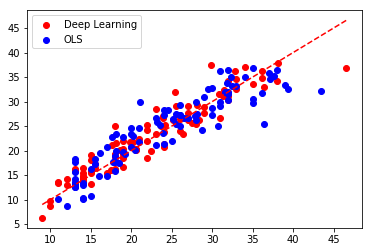

In [157]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_pred,c='r',label='Deep Learning')
plt.scatter(y_test2, y_pred2,c='b',label='OLS')
plt.legend()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
